## Categorical RQA

Categorical RQA (catRQA) is used to examine the dynamics of discrete behaviour sequences, such as [song lyrics](data/rqaCategorical/lyricsA.txt) or [eye movements](data/rqaCategorical/eyemovs_1.txt) between different locations. Recurrence analysis allows us to visualise the dynamics of a behaviour, by plotting 'recurrent' states on a 2D recurrence plot. Here, an integer number sequence is mapped to the orthogonal axis 𝑥𝑖 = 1...𝑛 and 𝑦𝑗 = 1...𝑛, of the 2-dimensional plot, and the states 𝑥𝑖 and 𝑦𝑗 that reoccur are plotted, indicated by blue points in the recurrence plot. From the plot, we can determine the degree of repetition, the length of repetitive sequences, and other important patterns in the data. RQA quantifies these properties through various metrics, including:

- Recurrence Rate (%REC): The percentage of recurrent points in the plot, which indicates how often states reoccur.
- Determinism (%DET): The percentage of recurrent points that form diagonal lines of at least a given length (e.g., 2 points), indicating patterns that repeat in the same order.
- Maxline: The length of the longest diagonal sequence of recurrent points.
- Meanline: The average length of diagonal lines in the plot, giving insight into typical repeating sequences.
- Entropy (ENT): The Shannon entropy of the distribution of diagonal line lengths, which measures the complexity of recurrent patterns.
- Laminarity (LAM): The percentage of recurrent points forming vertical lines, which can reflect how states are trapped for extended periods.

Notably, for auto-recurrence metrics, the main diagonal (i.e., the line of identity) is excluded from RQA metrics, as it simply reflects a point being recurrent with itself.

#### Parameters for Running Categorical RQA

To run categorical RQA, we need to set three parameters:

- Time delay - This represents the interval between samples required to unfold the temporal structure of a system's trajectory. The appropriate delay helps to reconstruct the system’s dynamics in the phase space. In catRQA, this is typically set to 1.
- Embedding dimension - This is the number of dimensions needed to recover the system's phase space. For categorical data, this is typically set to 1.
- Radius - This defines how close two states must be to be considered recurrent. In catRQA, the radius is set to zero or a very small value, ensuring that only exact matches between categorical states are considered recurrent.

#### Let's Practice Running RQA on Categorical Data

Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run RQA, and create visualisations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis. 

In [4]:
import os
import pandas as pd
from utils.rqa_utils import perform_rqa
from utils.plot_utils import plot_ts_and_rqa

Now that all the utilities are loaded, it's time to apply RQA to some real data — in this case, [song lyrics](data/rqaCategorical/lyricsA.txt). 

First, we need to represent the lyrics as a sequence of categorical integers. This means each word is assigned a unique number, starting from the first word and moving forward (e.g., ‘I’ = 1, ‘need’ = 2, ‘to’ = 3, etc.). For the files we're using, this encoding has already been done for you.

With our data prepared, we can proceed with running the RQA analysis. Just click the "play" button below to perform the analysis and generate the visualisations.

Loading file: lyricsA.txt


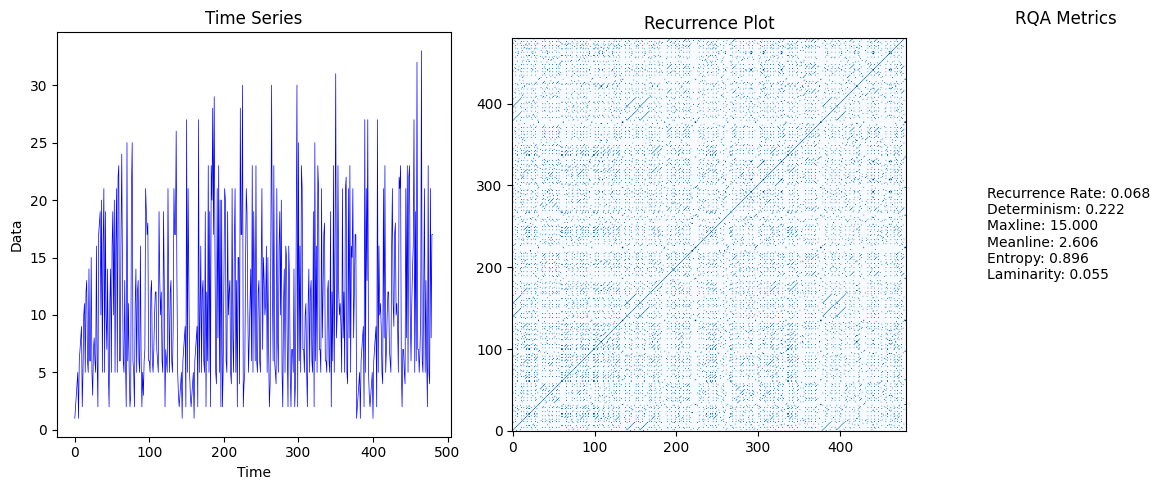

RQA analysis and plotting completed successfully!


In [5]:
# First set the directory path for the data
data_directory = "data/rqaCategorical/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "lyricsA.txt"
file_path = os.path.join(data_directory, file_name)

# Set RQA parameters
rqa_params = {
    'delay': 1,
    'embedding_dimension': 1,
    'radius': 0.0001,
    'minLine': 2,
    'getRP': True
}

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the file into a DataFrame
    data = pd.read_csv(file_path, header=None)

    # Assume the data is a single unnamed column
    numerical_data = data.iloc[:, 0].to_frame()

    # Perform RQA using the perform_rqa function from rqa_utils
    rqa_results, rp_results = perform_rqa(numerical_data, **rqa_params)

    # Create RQA metrics dictionary
    for column, result in rqa_results.items():
        rqa_metrics = {
            'Recurrence Rate': result.recurrence_rate,
            'Determinism': result.determinism,
            'Maxline': result.longest_diagonal_line,
            'Meanline': result.average_diagonal_line,
            'Entropy': result.entropy_diagonal_lines,
            'Laminarity': result.laminarity,
        }

    # Plot time series and recurrence plot side-by-side
    plot_ts_and_rqa(numerical_data[0].values, rp_results[0].recurrence_matrix, rqa_metrics, save_image, f'images/rqa/{file_name}_combined_plot.png')
    
    print('RQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

#### Interpreting the Results

If your code ran successfully, you should see the following RQA metrics for the song:

- %REC: 6.8% - This value tells us how often the words in the lyrics repeat, highlighting the overall recurrence in the song.
- %DET: 22.2% - This represents the proportion of recurrence points that form diagonal lines, indicating predictable patterns in word usage.
- Maxline: 15 - This metric identifies the longest sequence of repetitive word usage, helping us understand the longest repeating phrases in the song.
- Meanline: 2.6 - This is the average length of those repeating patterns, giving us insight into how long typical repeated phrases are.

Now, let's see how these metrics compare to a different song. Click "play" on the code chunk below to run the RQA on another [set of lyrics](data/rqaCategorical/lyricsB.txt) and observe the differences.

In [ ]:
# First set the directory path for the data
data_directory = "data/rqaCategorical/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file names for the data
file_names = ["lyricsA.txt", "lyricsB.txt"]

# Set RQA parameters
rqa_params = {
    'delay': 1,
    'embedding_dimension': 1,
    'radius': 0.0001,
    'minLine': 2,
    'getRP': True
}

# Loop through each file and perform RQA
for file_name in file_names:
    file_path = os.path.join(data_directory, file_name)

    # Check whether the file containing the categorical data exists
    if os.path.exists(file_path):
        print(f'Loading file: {file_name}')

        # Load the file into a DataFrame
        data = pd.read_csv(file_path, header=None)

        # Assume the data is a single unnamed column
        numerical_data = data.iloc[:, 0].to_frame()

        # Perform RQA using the perform_rqa function from rqa_utils
        rqa_results, rp_results = perform_rqa(numerical_data, **rqa_params)

        # Create RQA metrics dictionary
        for column, result in rqa_results.items():
            rqa_metrics = {
                'Recurrence Rate': result.recurrence_rate,
                'Determinism': result.determinism,
                'Maxline': result.longest_diagonal_line,
                'Meanline': result.average_diagonal_line,
                'Entropy': result.entropy_diagonal_lines,
                'Laminarity': result.laminarity,
            }

        # Plot time series and recurrence plot side-by-side
        plot_ts_and_rqa(numerical_data[0].values, rp_results[0].recurrence_matrix, rqa_metrics, save_image, f'images/rqa/{file_name}_combined_plot.png')
        
        print('RQA analysis and plotting completed successfully!')
    else:
        print(f'File {file_name} not found in directory {data_directory}')

#### Comparing the Results

If you examine the recurrence plots (RPs) and the resulting RQA metrics, you'll notice that the second song shows more recurrent activity than the first. There are more blue lines in the second plot, and the %REC (recurrence rate) and %DET (determinism) values are higher, indicating greater overall repetition and more extended sequences of repeating phrases.

#### Going Further

To expand your understanding of categorical RQA, you can try the following:

1. Analyse other time series: Repeat the analyses above with other types of categorical data such as [eye movements](data/rqaCategorical/eyemovs_1.txt) or [emotion data](data/rqaCategorical/emotion1-all-a.txt).
2. Experiment with other parameters: Although most nominal or categorical data uses the following parameters - delay = 1, embedding dimension = 1, radius = 0 (or .0001), try changing these to see how differences in the parameters affect the recurrence plots and metrics.